In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
from scipy.optimize import minimize
import galkin
import galkin.processdata   # routines to process kinematic data
import galkin.readparsFile  # routines to read and check input parameters
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
#10.3, 15.3, 7.7from the paper
# Galactic parameters
R0=8.0# Galactocentric distance (kpc)
V0=230.# local circular velocity (km/s)
UsunINUSE=11.10# solar motion in the U-direction (km/s), e.g. from Schoenrich+ '10, MNRAS 403, 1829 (2010)
VsunINUSE=12.24# solar motion in the V-direction (km/s), e.g. from Schoenrich+ '10, MNRAS 403, 1829 (2010)
WsunINUSE=07.25# solar motion in the W-direction (km/s), e.g. from Schoenrich+ '10, MNRAS 403, 1829 (2010)
SYSTDISP=0.# systematic dispersion due to spiral arm streaming (km/s)

In [3]:
# Flags
flagPROPERMOTIONS=0	 			# proper motions not supported in current version - please keep at 0
flagHITERMINAL=0				# whether to use HI terminal velocities
flagFich89tab2=0				# whether to use Fich+ '89, ApJ 342, 272 (1989) (Table 2)
flagMalhotra95=0				# whether to use Malhotra '95, ApJ 448, 138 (1995)
flagMcClureGriffithsDickey07=0			# whether to use McClure-Griffiths & Dickey '07, ApJ 671, 427 (2007)
flagHITHICKNESS=0				# whether to use the HI thickness method
flagHonmaSofue97=0				# whether to use Honma & Sofue '97, PASJ 49, 453 (1997)
flagCOTERMINAL=0				# whether to use CO terminal velocities
flagBurtonGordon78=0				# whether to use Burton & Gordon '78, A&A 63, 7 (1978)
flagClemens85=0					# whether to use Clemens '85, ApJ 295, 422 (1985)
flagKnapp85=0					# whether to use Knapp+ '85, AJ 90, 2 (1985)
flagLuna06=0					# whether to use Luna+ '06, ApJ 641, 938 (2006)
flagHIIREGIONS=1				# whether to use HII regions
flagBlitz79=0					# whether to use Blitz '79, ApJL 231, L115 (1979)
flagFich89tab1=0				# whether to use Fich+ '89, ApJ 342, 272 (1989) (Table 1)	
flagTurbideMoffat93=0				# whether to use Turbide & Moffat '93, AJ 105, 5 (1993)
flagBrandBlitz93=0				# whether to use Brand & Blitz '93, A&A 275, 67 (1993)
flagHou09tabA1=1				# whether to use Hou+ '09, A&A 499, 473 (2009) (Table A1)
flagGMC=0					# whether to use giant molecular clouds
flagHou09tabA2=0				# whether to use Hou+ '09, A&A 499, 473 (2009) (Table A2)
##
flagOPENCLUSTERS=0				# whether to use open clusters
flagFrinchaboyMajewski08=0			# whether to use Frinchaboy & Majewski '08, AJ 136, 118 (2008)
flagPLANETARYNEBULAE=0				# whether to use planetary nebulae
flagDurand98=0					# whether to use Durand+ '98, A&AS 132, 13 (1998)
flagCEPHEIDS=1					# whether to use classical cepheids
flagPont94=1					# whether to use Pont+ '94, A&A 285, 415 (1994)
flagPont97=0					# whether to use Pont+ '97, A&A 318, 416 (1997)
flagCSTARS=0					# whether to use carbon stars
flagDemersBattinelli07=0			# whether to use Demers & Battinelli '07, A&A 473, 143 (2007)
flagBattinelli12=0				# whether to use Battinelli+ '12, Ap 56, 68 (2013)
###
flagMASERS=0					# whether to use masers
flagReid14=0					# whether to use Reid+ '14, ApJ 783, 130 (2014)
flagHonma12=0					# whether to use Honma+ '12, PASJ 64, 136 (2012)
flagStepanishchevBobylev11=0			# whether to use Stepanishchev & Bobylev '11, AstL 37, 4 (2011)
flagXu13=0					# whether to use Xu+ '13, ApJ 769, 15 (2013)
flagBobylevBajkova13=0				# whether to use Bobylev & Bajkova '13, AstL 39, 809 (2013)
##
flagastropy=0				 	# whether to use astropy for equatorial-to-galactic conversions

In [4]:
inputpars=(R0,V0,UsunINUSE,VsunINUSE,WsunINUSE,SYSTDISP, flagPROPERMOTIONS,flagHITERMINAL,flagFich89tab2,flagMalhotra95,flagMcClureGriffithsDickey07, flagHITHICKNESS,flagHonmaSofue97,flagCOTERMINAL,flagBurtonGordon78,flagClemens85,flagKnapp85,flagLuna06, flagHIIREGIONS,flagBlitz79,flagFich89tab1,flagTurbideMoffat93,flagBrandBlitz93,flagHou09tabA1, flagGMC,flagHou09tabA2,flagOPENCLUSTERS,flagFrinchaboyMajewski08,flagPLANETARYNEBULAE,flagDurand98,flagCEPHEIDS,flagPont94,flagPont97, flagCSTARS,flagDemersBattinelli07,flagBattinelli12, flagMASERS,flagReid14,flagHonma12,flagStepanishchevBobylev11,flagXu13,flagBobylevBajkova13,flagastropy)

In [5]:
galkin.readparsFile.CheckAndPrintParameters(inputpars)

checking validity of input parameters...
printing input parameters...
 R0=  8.0  kpc
 V0=  230.0  km/s
 (Usun,Vsun,Wsun) = ( 11.1 , 12.24 , 7.25 ) km/s
 systematic dispersion =  0.0  km/s
 use HI terminal velocities?            0
 use HI thickness method?               0
 use CO terminal velocities?            0
 use HII regions?                       1
  use Blitz 79?                           0
  use Fich+ 89 (Table 1)?                 0
  use Turbide & Moffat 93?                0
  use Brand & Blitz 93?                   0
  use Hou+ 09 (Table A1)?                 1
 use giant molecular clouds?            0
 use open clusters?                     0
 use planetary nebulae?                 0
 use cepheids?                          1
  use Pont+ 94?                           1
  use Pont+ 97?                           0
 use C stars?                           0
 use masers?                            0
 use astropy?                           0


In [6]:
vecout=galkin.processdata.ProcessData(inputpars)
totallistvc=vecout[0]

processing HII regions...
 processing Hou+ 09 (Table A1)...
  selected  316  out of the total sample of  815  HII regions
processing classical cepheids...
 processing Pont+ 94...
  selected  245  out of the total sample of  278  cepheids


In [7]:
vecRp    = np.array([row[0] for row in totallistvc])# galactocentric distance [kpc]
vecerrRp = np.array([row[1] for row in totallistvc])# error in galactocentric distance [kpc]
vecvRp   = np.array([row[2] for row in totallistvc])# rotation velocity [km/s]
vecerrvRp= np.array([row[3] for row in totallistvc])# error in rotation velocity [km/s]

In [8]:
#Constants
G = 4.302e-6#kpc/SM(km/s)^2
q_b = 0.6
r_b = 1.9#kpc
a_b = 1.#kpc
q_h = 0.8
alpha_b = 1.8
R_m = 4.#kpc
#parameters
rho_b_I = 0.427e9#sM/kpc^3
a_h_I = 3.83#kpc
rho_h_I = 0.711e9#SM/kpc^3
#alpha_h_I = -2.
#beta_h_I = 2.96
R_d_I = 2.0#kpc
Sigma_d_SD_I = (1905.0e6)*0.75#SM/kpc^2
Sigma_g_ISM_I = (1905.0e6)*0.25#SM/kpc^2

In [9]:
def Vc_a_rho_h_rho_b(R,parameter,alpha_h=1.,beta_h=3.,R_d=R_d_I,Sigma_d_SD=Sigma_d_SD_I,Sigma_g_ISM=Sigma_g_ISM_I):
    a_h,rho_h,rho_b = parameter
    def Vc_b(R):
        def I_b(x,R):
            e = np.sqrt(1. - q_b**2.)
            n = x**(2.-alpha_b)*np.exp(-(R**2.*x**2.)/r_b**2.)
            d = np.sqrt(1.-x**2.*e**2.)
            t = R**2.*(R/a_b)**(-alpha_b)
            return (t*n)/d
        Integral_b = []
        for i in range (0,len(R)):
            result = integrate.quad(I_b,0,1,args=(R[i]))[0]
            Integral_b.append(result)
        return np.array(Integral_b)
    def Vc_DM(R):
        def I_h(x,R):
            e = np.sqrt(1.- q_h**2.)
            n = x**(2.-alpha_h)*(1.+ (x*R)/(a_h))**(alpha_h-beta_h)
            d = np.sqrt(1-x**2.*e**2)
            t = R**2.*(R/a_h)**(-alpha_h)
            result = (t*n)/d
            return result
        Integral_DM = []
        for i in range (0,len(R)):
            result = integrate.quad(I_h,0,1,args=(R[i]))[0]
            Integral_DM.append(result)
        return np.array(Integral_DM)
    def V2_c_SD(R):
        result = (R_d/R) - np.exp(-R/R_d) - (np.exp(-R/R_d)*R_d/R)
        return result
    def Vc_ISM(R):
        def M_g_ISM(u,R):
            return R*u*np.exp(-((R*u)/(2.*R_d))-(R_m/(R*u)))
        Integral_M_g = []
        for i in range (0,len(R)):
            result = integrate.quad(M_g_ISM,0,1,args=(R[i]))[0]
            Integral_M_g.append(result)
        return np.array(Integral_M_g)
    suma = 4.*np.pi*G*q_b*rho_b*Vc_b(R) + 4.*np.pi*G*q_h*rho_h*Vc_DM(R) + 2.*np.pi*G*Sigma_d_SD*R_d*V2_c_SD(R) + 2.*np.pi*Sigma_g_ISM*G*Vc_ISM(R)
    return np.sqrt(suma)

In [10]:
def Xi2_a_rho_h_rho_b(parameters):
    a_h,rho_h,rho_b = parameters
    par = a_h,np.exp(rho_h),np.exp(rho_b)
    model = Vc_a_rho_h_rho_b(vecRp,par)
    xi = np.sum((vecvRp-model)**2./(vecerrvRp)**2.)
    return xi

In [11]:
x0_a_rho_h_rho_b = np.array([1.0,np.log(1.0e8),np.log(0.001e8)])

In [12]:
LS_a_rho_h_rho_b = minimize(Xi2_a_rho_h_rho_b,x0_a_rho_h_rho_b,method='L-BFGS-B',bounds=((1.,9.),(np.log(0.1e8),np.log(20.0e8)),(np.log(0.001e8),np.log(1.0e8)),))

In [13]:
print LS_a_rho_h_rho_b

      fun: 1987.9792912593007
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([-0.08953975, -0.15161277,  0.06998562])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 144
      nit: 25
   status: 0
  success: True
        x: array([ 5.27535626, 18.49236405, 13.99801019])


In [14]:
pars_a_rho_h_rho_b_min = np.array([LS_a_rho_h_rho_b.x[0],np.exp(LS_a_rho_h_rho_b.x[1]),np.exp(LS_a_rho_h_rho_b.x[2])])
print pars_a_rho_h_rho_b_min

[5.27535626e+00 1.07431506e+08 1.20021371e+06]


In [15]:
R = np.linspace(0.1,15.,100)

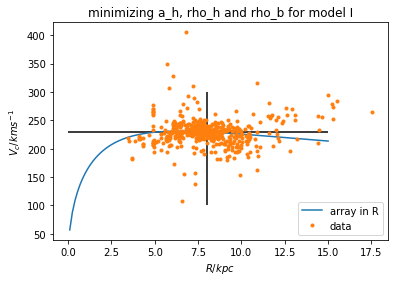

In [16]:
plt.plot(R,Vc_a_rho_h_rho_b(R,pars_a_rho_h_rho_b_min),label='array in R')
plt.plot(vecRp,vecvRp,'.',label='data')
plt.xlabel(r'$R/kpc$')
plt.ylabel(r'$V_{c}/km s^{-1}$')
plt.legend(loc='lower right', prop={'size':10})
plt.title("minimizing a_h, rho_h and rho_b for model I,NFW")
plt.hlines(230,0,15)
plt.vlines(8,100,300)

# $\alpha_{h}=1.63$ and $\beta_{h}=2.17$ 

In [18]:
#Constats model II
rho_b_II = 0.3e9#sM/kpc^3
a_h_II = 1.90#kpc
rho_h_II = 0.260e9#SM/kpc^3
#alpha_h_I = -2.
#beta_h_I = 2.96
R_d_II = 3.2#kpc
Sigma_d_SD_II = (536.0e6)*0.75#SM/kpc^2
Sigma_g_ISM_II = (536.0e6)*0.25#SM/kpc^2

In [19]:
def Vc_a_rho_h_rho_b_ModelII(R,parameter,alpha_h=1.63,beta_h=2.17,R_d=R_d_II,Sigma_d_SD=Sigma_d_SD_II,Sigma_g_ISM=Sigma_g_ISM_II):
    a_h,rho_h,rho_b = parameter
    def Vc_b(R):
        def I_b(x,R):
            e = np.sqrt(1. - q_b**2.)
            n = x**(2.-alpha_b)*np.exp(-(R**2.*x**2.)/r_b**2.)
            d = np.sqrt(1.-x**2.*e**2.)
            t = R**2.*(R/a_b)**(-alpha_b)
            return (t*n)/d
        Integral_b = []
        for i in range (0,len(R)):
            result = integrate.quad(I_b,0,1,args=(R[i]))[0]
            Integral_b.append(result)
        return np.array(Integral_b)
    def Vc_DM(R):
        def I_h(x,R):
            e = np.sqrt(1.- q_h**2.)
            n = x**(2.-alpha_h)*(1.+ (x*R)/(a_h))**(alpha_h-beta_h)
            d = np.sqrt(1-x**2.*e**2)
            t = R**2.*(R/a_h)**(-alpha_h)
            result = (t*n)/d
            return result
        Integral_DM = []
        for i in range (0,len(R)):
            result = integrate.quad(I_h,0,1,args=(R[i]))[0]
            Integral_DM.append(result)
        return np.array(Integral_DM)
    def V2_c_SD(R):
        result = (R_d/R) - np.exp(-R/R_d) - (np.exp(-R/R_d)*R_d/R)
        return result
    def Vc_ISM(R):
        def M_g_ISM(u,R):
            return R*u*np.exp(-((R*u)/(2.*R_d))-(R_m/(R*u)))
        Integral_M_g = []
        for i in range (0,len(R)):
            result = integrate.quad(M_g_ISM,0,1,args=(R[i]))[0]
            Integral_M_g.append(result)
        return np.array(Integral_M_g)
    suma = 4.*np.pi*G*q_b*rho_b*Vc_b(R) + 4.*np.pi*G*q_h*rho_h*Vc_DM(R) + 2.*np.pi*G*Sigma_d_SD*R_d*V2_c_SD(R) + 2.*np.pi*Sigma_g_ISM*G*Vc_ISM(R)
    return np.sqrt(suma)

In [20]:
def Xi2_a_rho_h_rho_b_ModelII(parameters):
    a_h,rho_h,rho_b = parameters
    par = a_h,np.exp(rho_h),np.exp(rho_b)
    model = Vc_a_rho_h_rho_b_ModelII(vecRp,par)
    xi = np.sum((vecvRp-model)**2./(vecerrvRp)**2.)
    return xi

In [21]:
x0_a_rho_h_rho_b_ModelII = np.array([0.01,np.log(1.0e8),np.log(0.0001e8)])

In [23]:
LS_a_rho_h_rho_b_ModelII = minimize(Xi2_a_rho_h_rho_b_ModelII,x0_a_rho_h_rho_b_ModelII,method='L-BFGS-B',bounds=((0.01,15.),(np.log(0.1e8),np.log(20.0e8)),(np.log(0.0001e8),np.log(30.0e8)),))

In [24]:
print LS_a_rho_h_rho_b_ModelII

      fun: 2046.7699977535162
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([-0.06441496, -0.0298769 ,  0.00050022])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 320
      nit: 56
   status: 0
  success: True
        x: array([ 0.94156783, 21.09163434,  9.32352903])


In [25]:
pars_a_rho_h_rho_b_ModelII_min = np.array([LS_a_rho_h_rho_b_ModelII.x[0],np.exp(LS_a_rho_h_rho_b_ModelII.x[1]),np.exp(LS_a_rho_h_rho_b_ModelII.x[2])])
print pars_a_rho_h_rho_b_ModelII_min

[9.41567828e-01 1.44537457e+09 1.11984318e+04]


(50.0, 300.0)

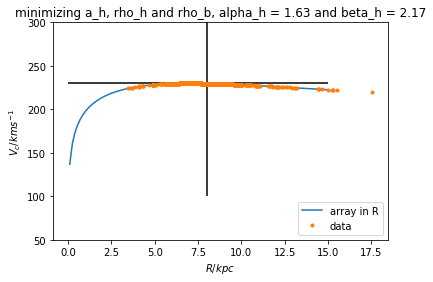

In [71]:
params_II = np.array([a_h_II,rho_h_II,rho_b_II])
#plt.plot(R,Vc_a_rho_h_rho_b_ModelII(R,pars_a_rho_h_rho_b_ModelII_min),label='array in R')
plt.plot(vecRp,Vc_a_rho_h_rho_b_ModelII(vecRp,pars_a_rho_h_rho_b_ModelII_min),'.',label='Fit')
plt.plot(vecRp,Vc_a_rho_h_rho_b_ModelII(vecRp,params_II),'.',label='Original')
plt.xlabel(r'$R/kpc$')
plt.ylabel(r'$V_{c}/km s^{-1}$')
plt.legend(loc='lower right', prop={'size':10})
plt.title("minimizing a_h, rho_h and rho_b for Model II")
plt.hlines(230,0,15)
plt.vlines(8,100,300)
plt.ylim(50.,300.)

# $\alpha_{h} = -2$ y $\beta_{h} = 2.96$

In [50]:
def Vc_a_rho_h_rho_b_ModelI(R,parameter,alpha_h=-2.,beta_h=2.96,R_d=R_d_I,Sigma_d_SD=Sigma_d_SD_I,Sigma_g_ISM=Sigma_g_ISM_I):
    a_h,rho_h,rho_b = parameter
    def Vc_b(R):
        def I_b(x,R):
            e = np.sqrt(1. - q_b**2.)
            n = x**(2.-alpha_b)*np.exp(-(R**2.*x**2.)/r_b**2.)
            d = np.sqrt(1.-x**2.*e**2.)
            t = R**2.*(R/a_b)**(-alpha_b)
            return (t*n)/d
        Integral_b = []
        for i in range (0,len(R)):
            result = integrate.quad(I_b,0,1,args=(R[i]))[0]
            Integral_b.append(result)
        return np.array(Integral_b)
    def Vc_DM(R):
        def I_h(x,R):
            e = np.sqrt(1.- q_h**2.)
            n = x**(2.-alpha_h)*(1.+ (x*R)/(a_h))**(alpha_h-beta_h)
            d = np.sqrt(1-x**2.*e**2)
            t = R**2.*(R/a_h)**(-alpha_h)
            result = (t*n)/d
            return result
        Integral_DM = []
        for i in range (0,len(R)):
            result = integrate.quad(I_h,0,1,args=(R[i]))[0]
            Integral_DM.append(result)
        return np.array(Integral_DM)
    def V2_c_SD(R):
        result = (R_d/R) - np.exp(-R/R_d) - (np.exp(-R/R_d)*R_d/R)
        return result
    def Vc_ISM(R):
        def M_g_ISM(u,R):
            return R*u*np.exp(-((R*u)/(2.*R_d))-(R_m/(R*u)))
        Integral_M_g = []
        for i in range (0,len(R)):
            result = integrate.quad(M_g_ISM,0,1,args=(R[i]))[0]
            Integral_M_g.append(result)
        return np.array(Integral_M_g)
    suma = 4.*np.pi*G*q_b*rho_b*Vc_b(R) + 4.*np.pi*G*q_h*rho_h*Vc_DM(R) + 2.*np.pi*G*Sigma_d_SD*R_d*V2_c_SD(R) + 2.*np.pi*Sigma_g_ISM*G*Vc_ISM(R)
    return np.sqrt(suma)

In [51]:
def Xi2_a_rho_h_rho_b_ModelI(parameters):
    a_h,rho_h,rho_b = parameters
    par = a_h,np.exp(rho_h),np.exp(rho_b)
    model = Vc_a_rho_h_rho_b_ModelI(vecRp,par)
    xi = np.sum((vecvRp-model)**2./(vecerrvRp)**2.)
    return xi

In [52]:
x0_a_rho_h_rho_b_ModelI = np.array([1.0,np.log(1.0e8),np.log(1.0e8)])

In [54]:
LS_a_rho_h_rho_b_ModelI = minimize(Xi2_a_rho_h_rho_b_ModelI,x0_a_rho_h_rho_b_ModelI,method='L-BFGS-B',bounds=((1.,15.),(np.log(0.1e8),np.log(20.0e8)),(np.log(1.0e8),np.log(30.0e8)),))

In [55]:
print LS_a_rho_h_rho_b_ModelI

      fun: 2050.183239469296
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 4.54747351e-05, -1.02530112e+02, -4.54747351e-05])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 220
      nit: 33
   status: 0
  success: True
        x: array([ 2.11556872, 21.41641302, 20.6389172 ])


In [56]:
pars_a_rho_h_rho_b_ModelI_min = np.array([LS_a_rho_h_rho_b_ModelI.x[0],np.exp(LS_a_rho_h_rho_b_ModelI.x[1]),np.exp(LS_a_rho_h_rho_b_ModelI.x[2])])
print pars_a_rho_h_rho_b_ModelI_min

[2.11556872e+00 2.00000000e+09 9.19110760e+08]


(50.0, 300.0)

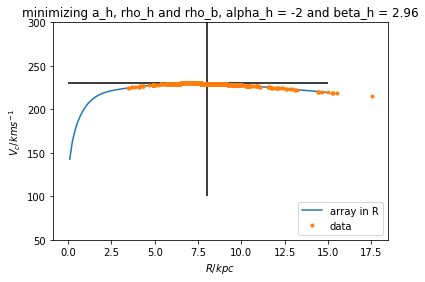

In [59]:
#plt.plot(R,Vc_a_rho_h_rho_b_ModelI(R,pars_a_rho_h_rho_b_ModelI_min),label='array in R')
pars_ModelI = np.array([a_h_I,rho_h_I,rho_b_I])
plt.plot(vecRp,Vc_a_rho_h_rho_b_ModelI(vecRp,pars_a_rho_h_rho_b_ModelI_min),'.',label='Fit')
plt.plot(vecRp,Vc_a_rho_h_rho_b_ModelI(vecRp,pars_ModelI),'.',label='Original')
plt.xlabel(r'$R/kpc$')
plt.ylabel(r'$V_{c}/km s^{-1}$')
plt.legend(loc='lower right', prop={'size':10})
plt.title("minimizing a_h, rho_h and rho_bfor model I")
plt.hlines(230,0,15)
plt.vlines(8,100,300)
plt.ylim(50.,300.)

# Minimizing model II

In [74]:
def Vc_a_rho_h_rho_b_II(R,parameter,alpha_h=1.,beta_h=3.,R_d=R_d_II,Sigma_d_SD=Sigma_d_SD_II,Sigma_g_ISM=Sigma_g_ISM_II):
    a_h,rho_h,rho_b = parameter
    def Vc_b(R):
        def I_b(x,R):
            e = np.sqrt(1. - q_b**2.)
            n = x**(2.-alpha_b)*np.exp(-(R**2.*x**2.)/r_b**2.)
            d = np.sqrt(1.-x**2.*e**2.)
            t = R**2.*(R/a_b)**(-alpha_b)
            return (t*n)/d
        Integral_b = []
        for i in range (0,len(R)):
            result = integrate.quad(I_b,0,1,args=(R[i]))[0]
            Integral_b.append(result)
        return np.array(Integral_b)
    def Vc_DM(R):
        def I_h(x,R):
            e = np.sqrt(1.- q_h**2.)
            n = x**(2.-alpha_h)*(1.+ (x*R)/(a_h))**(alpha_h-beta_h)
            d = np.sqrt(1-x**2.*e**2)
            t = R**2.*(R/a_h)**(-alpha_h)
            result = (t*n)/d
            return result
        Integral_DM = []
        for i in range (0,len(R)):
            result = integrate.quad(I_h,0,1,args=(R[i]))[0]
            Integral_DM.append(result)
        return np.array(Integral_DM)
    def V2_c_SD(R):
        result = (R_d/R) - np.exp(-R/R_d) - (np.exp(-R/R_d)*R_d/R)
        return result
    def Vc_ISM(R):
        def M_g_ISM(u,R):
            return R*u*np.exp(-((R*u)/(2.*R_d))-(R_m/(R*u)))
        Integral_M_g = []
        for i in range (0,len(R)):
            result = integrate.quad(M_g_ISM,0,1,args=(R[i]))[0]
            Integral_M_g.append(result)
        return np.array(Integral_M_g)
    suma = 4.*np.pi*G*q_b*rho_b*Vc_b(R) + 4.*np.pi*G*q_h*rho_h*Vc_DM(R) + 2.*np.pi*G*Sigma_d_SD*R_d*V2_c_SD(R) + 2.*np.pi*Sigma_g_ISM*G*Vc_ISM(R)
    return np.sqrt(suma)

In [75]:
def Xi2_a_rho_h_rho_b_II(parameters):
    a_h,rho_h,rho_b = parameters
    par = a_h,np.exp(rho_h),np.exp(rho_b)
    model = Vc_a_rho_h_rho_b_II(vecRp,par)
    xi = np.sum((vecvRp-model)**2./(vecerrvRp)**2.)
    return xi

In [80]:
x0_a_rho_h_rho_b_II = np.array([1.0,np.log(1.0e8),np.log(0.001e8)])

In [81]:
LS_a_rho_h_rho_b_II = minimize(Xi2_a_rho_h_rho_b_II,x0_a_rho_h_rho_b_II,method='L-BFGS-B',bounds=((1.,15.),(np.log(0.1e8),np.log(20.0e8)),(np.log(0.001e8),np.log(10.0e8)),))

In [82]:
print LS_a_rho_h_rho_b_II

      fun: 2002.8410859904568
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([0.00291038, 0.01828084, 0.01919034])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 128
      nit: 25
   status: 0
  success: True
        x: array([ 2.89674917, 19.99433386, 12.92582498])


In [83]:
pars_a_rho_h_rho_b_II_min = np.array([LS_a_rho_h_rho_b_II.x[0],np.exp(LS_a_rho_h_rho_b_II.x[1]),np.exp(LS_a_rho_h_rho_b_II.x[2])])
print pars_a_rho_h_rho_b_II_min

[2.89674917e+00 4.82423956e+08 4.10784892e+05]


(50.0, 300.0)

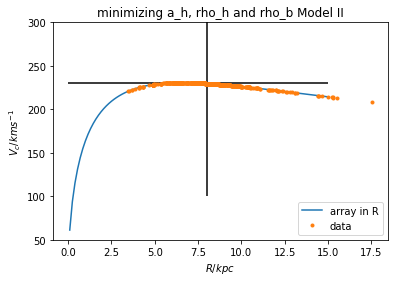

In [85]:
plt.plot(R,Vc_a_rho_h_rho_b_II(R,pars_a_rho_h_rho_b_II_min),label='array in R')
plt.plot(vecRp,Vc_a_rho_h_rho_b_II(vecRp,pars_a_rho_h_rho_b_II_min),'.',label='data')
plt.xlabel(r'$R/kpc$')
plt.ylabel(r'$V_{c}/km s^{-1}$')
plt.legend(loc='lower right', prop={'size':10})
plt.title("minimizing a_h, rho_h and rho_b Model II,NFW")
plt.hlines(230,0,15)
plt.vlines(8,100,300)
plt.ylim(50.,300.)